# Individual project

---

**Deep Learning Systems**

*Maria-Daliana Moga*

2023 autumn

# Table of contents



1. Dataset description


2. Goals and objectives


3. Data preparation (fix missing values, remove outliers and etc.), exploratory data analysis
(histograms, scatter plots, correlation coefficients).


4. Machine learning (except neural networks, e.g. decision tree, k-NN) algorithm (choose 1
method) for your data analysis.


5. Neural networks for your data analysis (choose 2 methods):

*   Multilayer perceptron (MPL)
*   Recurrent Neural Networks (RNN)


6. Estimation of the classification or prediction accuracy on the training and test set errors.


7. Analyse the parameters of the machine learning methods on the classification accuracy
(follow the description of the relevant practicals).


8. Comparison of ML methods for classification or prediction with the best parameters selected


9. Conclusions

# 1. Dataset description

---



**National Health and Nutrition Health Survey 2013-2014 (NHANES)**


The NHANES dataset was created to assess the health and nutritional status of adults and children in the United States. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.


---


SEQN: unique identifier assigned to each individual participant or subject in the dataset

age_group: categorizes individuals into specific age ranges

RIDAGEYR: participant's age in years at the time of the survey or examination.

RIAGENDR:  represents the participant's gender

PAQ605: contain information regarding a person's physical activity habits, frequency, or intensity of exercise

BMXBMI:  to Body Mass Index (BMI)

LBXGLU: represent blood glucose levels

DIQ010: contain information about blood sugar levels

LBXGLT: aspects related to glucose concentrations in the blood

LBXIN: biomarkers other than glucose

In [ ]:
# import the dataset to google colab
from google.colab import files


uploaded = files.upload()

Saving NHANES_age_prediction.csv to NHANES_age_prediction.csv


In [ ]:
import pandas as pd
url = 'NHANES_age_prediction.csv'
df = pd.read_csv(url)
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [ ]:
df.keys() # return column labels of the DataFrame

Index(['SEQN', 'age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI',
       'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN'],
      dtype='object')

In [ ]:
print(df['SEQN'])

0       73564.0
1       73568.0
2       73576.0
3       73577.0
4       73580.0
         ...   
2273    83711.0
2274    83712.0
2275    83713.0
2276    83718.0
2277    83727.0
Name: SEQN, Length: 2278, dtype: float64


# 2. Goals and objectives

---



I want to predict the age group of each individual:

*   Below 18 : Teenager
*   Between 18 and 35 : Young Adult
*   Between 35 and 65 : Adult
*   Above 65 : Senior



# 3. Data preparation

---



In [ ]:
# Function to categorize age groups
def categorize_age_group(RIDAGEYR):
    if RIDAGEYR < 18:
        return 'Teenager'
    elif RIDAGEYR >= 18 and RIDAGEYR < 35:
        return 'Young Adult'
    elif RIDAGEYR >= 35 and RIDAGEYR < 65:
        return 'Adult'
    elif RIDAGEYR >= 65:
        return 'Senior'

# Apply the categorization function to create a new column 'age_category'
df['age_group'] = df['RIDAGEYR'].apply(categorize_age_group)

In [ ]:
# Display the DataFrame
df

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Young Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Teenager,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Young Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Young Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [ ]:
# find out what type of variables you have in your data set
# this line also shows how much memory the data set uses
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [ ]:
df.shape #this shows how many rows(2278) and how many columns(10) we have

(2278, 10)

In [ ]:
df.columns #shows the current names of the collumns

Index(['SEQN', 'age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI',
       'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN'],
      dtype='object')

In [ ]:
df.describe()   #this function gives us some statistics operations such as:mean, standard deviation or maxim

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [ ]:
df['PAQ605'].describe()   #we can use the same function for individual collumns

count    2278.000000
mean        1.822651
std         0.398918
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: PAQ605, dtype: float64

In [ ]:
print('Mean:', df['DIQ010'].mean()) # mean
print('The most repeted value:', df['DIQ010'].mode().item()) # write the most repeted value
print('Median:', df['DIQ010'].median()) # median

Mean: 2.0162423178226514
The most repeted value: 2.0
Median: 2.0


In [ ]:
# Select two specific features for x and y
x_feature = 'LBXGLT'  # You can choose any feature from the dataset
y_feature = 'LBXIN'   # You can choose any feature from the dataset

x_feature

'LBXGLT'

I created a  scatter plot that shows the relationship between LBXGLT	and LBXIN. It visualizes how these features vary across samples.

In [ ]:
!pip install matplotlib pandas scikit-learn

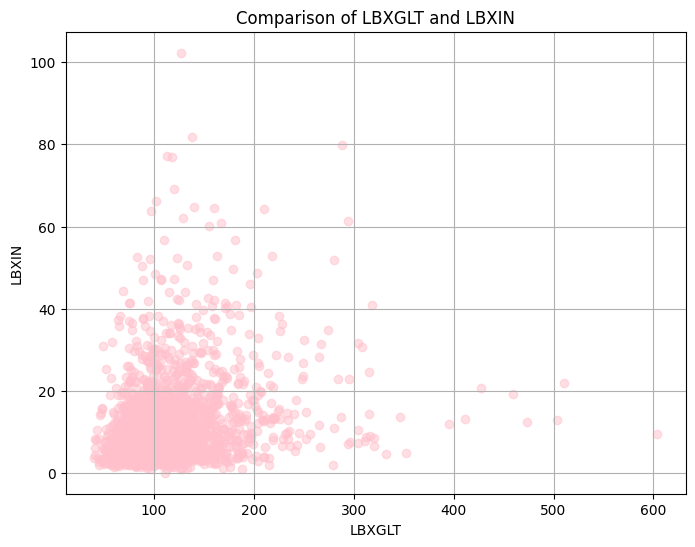

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting LBXGLT vs LBXIN
plt.figure(figsize=(8, 6)) # Set the figure size
plt.scatter(df['LBXGLT'], df['LBXIN'], alpha=0.5, c="pink") # the values to plot
plt.title('Comparison of LBXGLT and LBXIN') # Set the title
plt.xlabel('LBXGLT') # Set x-axis label
plt.ylabel('LBXIN') # Set y-axis label
plt.grid(True) # Show grid
plt.show() # Display the plot


*Pearson correlation coefficient*

Pearson correlation coefficient is a statistical measure of the linear correlation between two variables. It is a value between -1 and 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

Pearson's r is calculated by dividing the covariance of the two variables by the product of their standard deviations. This means that it takes into account both the strength and direction of the relationship between the variables.




In [ ]:
x = df['LBXGLT']  # Column LBXGLT
y = df['LBXIN']   # Column LBXIN
print("Pearson's r") # writes a message
print(x.corr(y))   # the pearson corelation coefficient between LBXGLT and LBXIN
print(y.corr(x))   # the pearson corelation coefficient between LBXIN and LBXGLT

Pearson's r
0.21727158632214388
0.21727158632214388


*Spearman's rank correlation*

Spearman's rank correlation coefficient is a nonparametric measure of rank correlation. It assesses how well the relationship between two variables can be described using a monotonic function.

Monotonicity means that the two variables either increase or decrease together.

Spearman's rho is calculated by ranking the data for each variable and then calculating the Pearson correlation coefficient between the ranks. The result is a value between -1 and 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

In [ ]:
print("Spearman's rho")
print(x.corr(y, method='spearman'))

Spearman's rho
0.24249076691520766


*Kendall's tau*

Kendall's tau is a non-parametric correlation coefficient that measures the strength and direction of the relationship between two variables. It is used to assess the association between two ordinal or continuous variables, making it a versatile tool for various statistical analyses.



Kendall's tau is calculated based on the concordant and discordant pairs of observations in the data. A concordant pair refers to two observations where the ranking of one variable agrees with the ranking of the other variable. Conversely, a discordant pair occurs when the rankings of the two variables disagree.

The Kendall's tau coefficient ranges from -1 to 1. A value of 1 indicates a perfect positive correlation, meaning that the two variables are always ranked in the same order. A value of 0 indicates no correlation, and a value of -1 indicates a perfect negative correlation, implying that the two variables are always ranked in opposite orders.

In [ ]:
print("Kendall's tau")
print(x.corr(y, method='kendall'))

Kendall's tau
0.1659149350920838


In [ ]:
# display the correlation matrix
# a correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set.
# The matrix is a table in which every cell contains a correlation coefficient, where:
# 1 is considered a strong relationship between variables,
# 0 a neutral relationship,
# -1 a not strong relationship
corr_matrix = df.corr()
display(corr_matrix)

<ipython-input-18-9b5eab2ead16>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
SEQN,1.000000,-0.008806,-0.012962,-0.019701,-0.061343,-0.004147,0.014102,0.006036,-0.040028
RIDAGEYR,-0.008806,1.000000,0.006398,0.025973,0.147163,0.229624,0.049970,0.318044,-0.091879
RIAGENDR,-0.012962,0.006398,1.000000,0.151076,0.063873,-0.132342,-0.032769,0.017406,-0.016660
PAQ605,-0.019701,0.025973,0.151076,1.000000,-0.042935,-0.007849,-0.002599,0.060413,0.010011
BMXBMI,-0.061343,0.147163,0.063873,-0.042935,1.000000,0.208330,0.047133,0.193375,0.552717
LBXGLU,-0.004147,0.229624,-0.132342,-0.007849,0.208330,1.000000,-0.004427,0.685579,0.211911
DIQ010,0.014102,0.049970,-0.032769,-0.002599,0.047133,-0.004427,1.000000,0.009796,0.058986
LBXGLT,0.006036,0.318044,0.017406,0.060413,0.193375,0.685579,0.009796,1.000000,0.217272
LBXIN,-0.040028,-0.091879,-0.016660,0.010011,0.552717,0.211911,0.058986,0.217272,1.000000


In [ ]:
corr_matrix.at['LBXGLU',	'DIQ010']

-0.004427431146038598

In [ ]:
# import the needed libraries
import pandas as pd  # data manipulation and analysis
import numpy as np  # scientific computing
import timeit  # measure the execution time
import matplotlib.pyplot as plt  # plotting

In [ ]:
# isnull() function checks for null values in each column of the DataFrame df.
# sum() function is used to calculate the total number of null values in each column.
df.isnull().sum()
# all the results are 0, which indicates that we have no missing values

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [ ]:
df["PAQ605"].describe()  # provides a summary of the SEQN column

count    2278.000000
mean        1.822651
std         0.398918
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: PAQ605, dtype: float64

In [ ]:
df["PAQ605"].unique()  #  returns an array containing all the unique values present in a column

array([2., 1., 7.])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of One-hot-encoder
enc = OneHotEncoder()  #  creates an instance of the OneHotEncoder class

# Passing encoded columns

enc_data = pd.DataFrame(enc.fit_transform(   # fitting and transforming the PAQ605 column
    df[['PAQ605']]).toarray())

# Merge with main
df2 = df.join(enc_data)  # joins the encoded data (enc_data) with the original DataFrame ('df')

display(df2)  #  display df2

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,0,1,2
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0.0,1.0,0.0
1,73568.0,Young Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0.0,1.0,0.0
2,73576.0,Teenager,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0.0,1.0,0.0
3,73577.0,Young Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,0.0,1.0,0.0
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,0.0,1.0,0.0
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,0.0,1.0,0.0
2275,83713.0,Young Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,0.0,1.0,0.0
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,0.0,1.0,0.0


In [ ]:
df2.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,0,1,2
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0.0,1.0,0.0
1,73568.0,Young Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0.0,1.0,0.0
2,73576.0,Teenager,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0.0,1.0,0.0
3,73577.0,Young Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,0.0,1.0,0.0
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,1.0,0.0,0.0


In [ ]:
df['PAQ605'].unique()  # obtain an array of unique values in the PAQ605	column

array([2., 1., 7.])

In [ ]:
# Remove the outliers using the IQR method

# List of columns to exclude from outlier removal
columns_to_exclude = ['age_group',	'RIDAGEYR',	'RIAGENDR']

# List of columns to process for outlier removal
columns_to_process = [col for col in df.columns if col not in columns_to_exclude]

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from selected columns
data_without_outliers = remove_outliers_iqr(df, columns_to_process)

# data_without_outliers now contains the dataset with outliers removed from selected columns
df = data_without_outliers
df

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Young Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Teenager,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Young Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
5,73581.0,Adult,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08
...,...,...,...,...,...,...,...,...,...,...
2272,83707.0,Young Adult,18.0,1.0,2.0,22.5,98.0,2.0,79.0,3.51
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2275,83713.0,Young Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


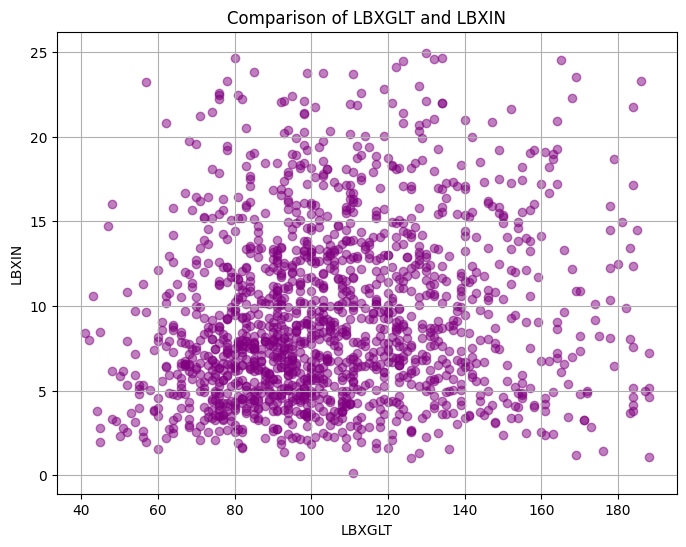

In [ ]:
# Plotting LBXGLT vs LBXIN
plt.figure(figsize=(8, 6)) # Set the figure size
plt.scatter(df['LBXGLT'], df['LBXIN'], alpha=0.5, c="purple") # the values to plot
plt.title('Comparison of LBXGLT and LBXIN') # Set the title
plt.xlabel('LBXGLT') # Set x-axis label
plt.ylabel('LBXIN') # Set y-axis label
plt.grid(True) # Show grid
plt.show() # Display the plot

In [ ]:
df.shape #this shows how many rows(1526) and how many columns(10) we have after cutting the outliers

(1526, 10)

In [ ]:
# #Normalization = (variable-variable_minim)/(varuiable_maxim-variable_minim)
numeric_cols = df2.select_dtypes(include=['number']).columns
normalized_df = (df2[numeric_cols] - df2[numeric_cols].min()) / (df2[numeric_cols].max() - df2[numeric_cols].min())

normalized_df.head() # print the first rows of the normalized data set

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,0,1,2
0,0.000000,0.720588,1.0,0.166667,0.381295,0.137427,0.5,0.195035,0.144591,0.0,1.0,0.0
1,0.000394,0.205882,1.0,0.166667,0.104317,0.076023,0.5,0.070922,0.036319,0.0,1.0,0.0
2,0.001181,0.058824,0.0,0.166667,0.156475,0.076023,0.5,0.049645,0.058737,0.0,1.0,0.0
3,0.001279,0.294118,0.0,0.166667,0.258993,0.119883,0.5,0.078014,0.156730,0.0,1.0,0.0
4,0.001574,0.382353,1.0,0.000000,0.384892,0.116959,0.5,0.072695,0.105531,1.0,0.0,0.0


In [ ]:
df3 = normalized_df.iloc[:, 0:10].copy()  # make a copy of the normalized data set

In [ ]:
df3.shape  # # this shows how many rows(2278) and how many columns(10) we have

(2278, 10)

In [ ]:
# extract the independent variables (X) and the target variable (y) from the DataFrame df3 and convert them to NumPy arrays

X = df3.iloc[:,1:9]  #independent columns
y = df3.iloc[:,1]    #target column

X = X.to_numpy()  # converts the X DataFrame to a NumPy array
y = y.to_numpy()  #  converts the y DataFrame to a NumPy array

In [ ]:
columns_to_drop_indices = [9]
df3.drop(df3.columns[columns_to_drop_indices], axis=1, inplace=True)

In [ ]:
df3.insert(1, 'age_group', df['age_group'])

In [ ]:
df3.dropna(subset = ['age_group'], inplace = True)

#4. Machine learning algorithm for data analysis

---



I experimented with three machine learning algorithms: KNN, Decision Tree, and SVM. After evaluating them, I found that SVM performed the best on my dataset, achieving the highest accuracy among the three.

*SVM*

Support vector machines (SVMs) are a type of supervised machine learning algorithm used to solve classification and regression tasks. SVMs are particularly good at solving binary classification problems, which require classifying the elements of a data set into two groups.

In [ ]:
df = df3
print(df.columns)

Index(['SEQN', 'age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI',
       'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN'],
      dtype='object')


In [ ]:
# I choose to use only 25% of the total dataset, because its size generates a long compling time
import random

total_rows = df.shape[0] # Get the total number of rows in the DataFrame

rows_to_remove = int(total_rows * 0.75) # Calculate the number of rows to remove (75% of the total rows)

indices_to_keep = random.sample(range(total_rows), total_rows - rows_to_remove) # Generate a list of indices to keep (25% of the total rows)

new_df = df.iloc[indices_to_keep] # Filter the DataFrame to keep only the rows with the selected indices

# Check the length and the content of the remaining data
print(f"Remaining data length: {len(new_df)}")
new_df.head()

Remaining data length: 382


,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2154,0.938699,Adult,0.691176,0.0,0.166667,0.147482,0.084795,0.5,0.120567,0.023789
385,0.175637,Adult,0.617647,0.0,0.166667,0.179856,0.102339,0.5,0.072695,0.147430
1746,0.767883,Senior,0.779412,1.0,0.166667,0.170863,0.131579,0.5,0.134752,0.069995
1886,0.830168,Adult,0.558824,0.0,0.166667,0.232014,0.102339,0.5,0.090426,0.052178
218,0.097904,Young Adult,0.102941,1.0,0.166667,0.160072,0.099415,0.5,0.092199,0.113167


In [ ]:
# performs cross-validation and evaluates the performance of a linear SVM classifier for multiclass classification

# the next 2 lines set the random seed to ensure reproducibility of the results
seed=77
np.random.seed(seed)
from sklearn.model_selection import StratifiedKFold  #  imports the StratifiedKFold class - a cross-validation technique that preserves the class distribution in each fold.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)  # reates a StratifiedKFold object with 10 splits (folds) for cross-validation
from sklearn.svm import SVC  # imports the SVC class - s an implementation of the Support Vector Machine algorithm for classification tasks
# the next 2 lines import the confusion_matrix and accuracy_score functions from scikit-learn - used to evaluate the performance of the classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import statistics  # provides various mathematical statistics functions

# Separate features and target variable
X = new_df[["RIAGENDR","PAQ605",	"BMXBMI",	"LBXGLU",	"DIQ010",	"LBXGLT",	"LBXIN"]] # I removed the colmns: RIDAGEYR (because it contains that ages of the individuals) SEQN (it contains a number reprezentig the indiviual, which I think is not relevant in our case)
y = new_df["age_group"]  # Accessing the target variable age_group from the DataFrame 'df

# dividing X, y into train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

i = 1  # inlitialized the value of i with 1
accuracy_model = []  # creates an empty list accuracy_model to store the accuracy scores of each iteration of cross-validation
for train, test in cv.split(X, y):  # loop over the cross-validation splits
    print('\n-----------------------------------------------------------------')  # print \n-----------------------------------------------------------------
    print('Running cross validation sample %d' % (i))                             # print Running cross validation sample %d' 'value of i'
    print('------------------------------------------------------------------')   # print ------------------------------------------------------------------

    print("Dimension of Train set",X.iloc[train].shape)     # print Dimension of Train set ' shape or dimensions of the training set X train'
    print("Dimension of Test set",X.iloc[test].shape,"\n")  # print Dimension of Test set ' shape or dimensions of the training set X test'

    # training a linear SVM classifier
    svm_model_linear = SVC(decision_function_shape='ovr', kernel = 'linear', C = 1).fit(X.iloc[train], y.iloc[train])  # trains a linear SVM classifier on the training data
    svm_predictions = svm_model_linear.predict(X.iloc[test]) # generates predictions using the trained linear SVM classifier on the test data

    # model accuracy for X_test
    accuracySVM = svm_model_linear.score(X.iloc[test], y.iloc[test])  # calculates the accuracy of the classifier by comparing the predictions with the true labels in the test set

    # creating a confusion matrix
    cm = confusion_matrix(y.iloc[test], svm_predictions)  # computes the confusion matrix by comparing the true labels with the predicted labels

    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y.iloc[test], svm_model_linear.predict(X.iloc[test]), normalize=True)*100)  # calculates the accuracy of the model

    print("Accuracy:", accuracySVM) # print Accuracy and the value of the accuracy variable
    print(cm)  # print the value of cm

    # Print the accuracy
    print(accuracy_model)  # prints the list of accuracy scores
    print(statistics.mean(accuracy_model))  # calculates and prints the average accuracy across all iterations

    i += 1  # increments the value of i by 1

x_test_SVM = X.iloc[test]
Y_test_SVM = y.iloc[test]
x_train_SVM = X.iloc[train]
Y_train_SVM = y.iloc[train]


-----------------------------------------------------------------
Running cross validation sample 1
------------------------------------------------------------------
Dimension of Train set (343, 7)
Dimension of Test set (39, 7) 

Accuracy: 0.41025641025641024
[[16  0  0  0]
 [ 6  0  0  0]
 [ 7  0  0  0]
 [10  0  0  0]]
[41.02564102564102]
41.02564102564102

-----------------------------------------------------------------
Running cross validation sample 2
------------------------------------------------------------------
Dimension of Train set (343, 7)
Dimension of Test set (39, 7) 

Accuracy: 0.41025641025641024
[[16  0  0  0]
 [ 5  0  0  0]
 [ 7  0  0  0]
 [11  0  0  0]]
[41.02564102564102, 41.02564102564102]
41.02564102564102

-----------------------------------------------------------------
Running cross validation sample 3
------------------------------------------------------------------
Dimension of Train set (344, 7)
Dimension of Test set (38, 7) 

Accuracy: 0.421052631578947

# 5. Neural networks for data analysis

---



**Multilayer perceptron (MLP)**
- a type of feedforward neural network
- is suitable for the NHANES dataset because it is good at handling classification tasks, the dataset is relatively small and structured, and MLPs offer flexibility in modeling nonlinear relationships between features and target classes

**Recurrent Neural Networks (RNN)**
- neural networks designed for sequential data, capable of retaining memory of previous inputs
- is a good choice due to its effectiveness with large datasets. While powerful, their performance hinges on dataset size, computational capacity, and appropriate preprocessing.

# 6. Estimation of the classification or prediction accuracy on the training and test set errors

---



*Classification with Multilayer Perceptron (MLP)*

In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # configure Matplotlib to use the 'seaborn' style

<ipython-input-40-5254539a71b5>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # configure Matplotlib to use the 'seaborn' style


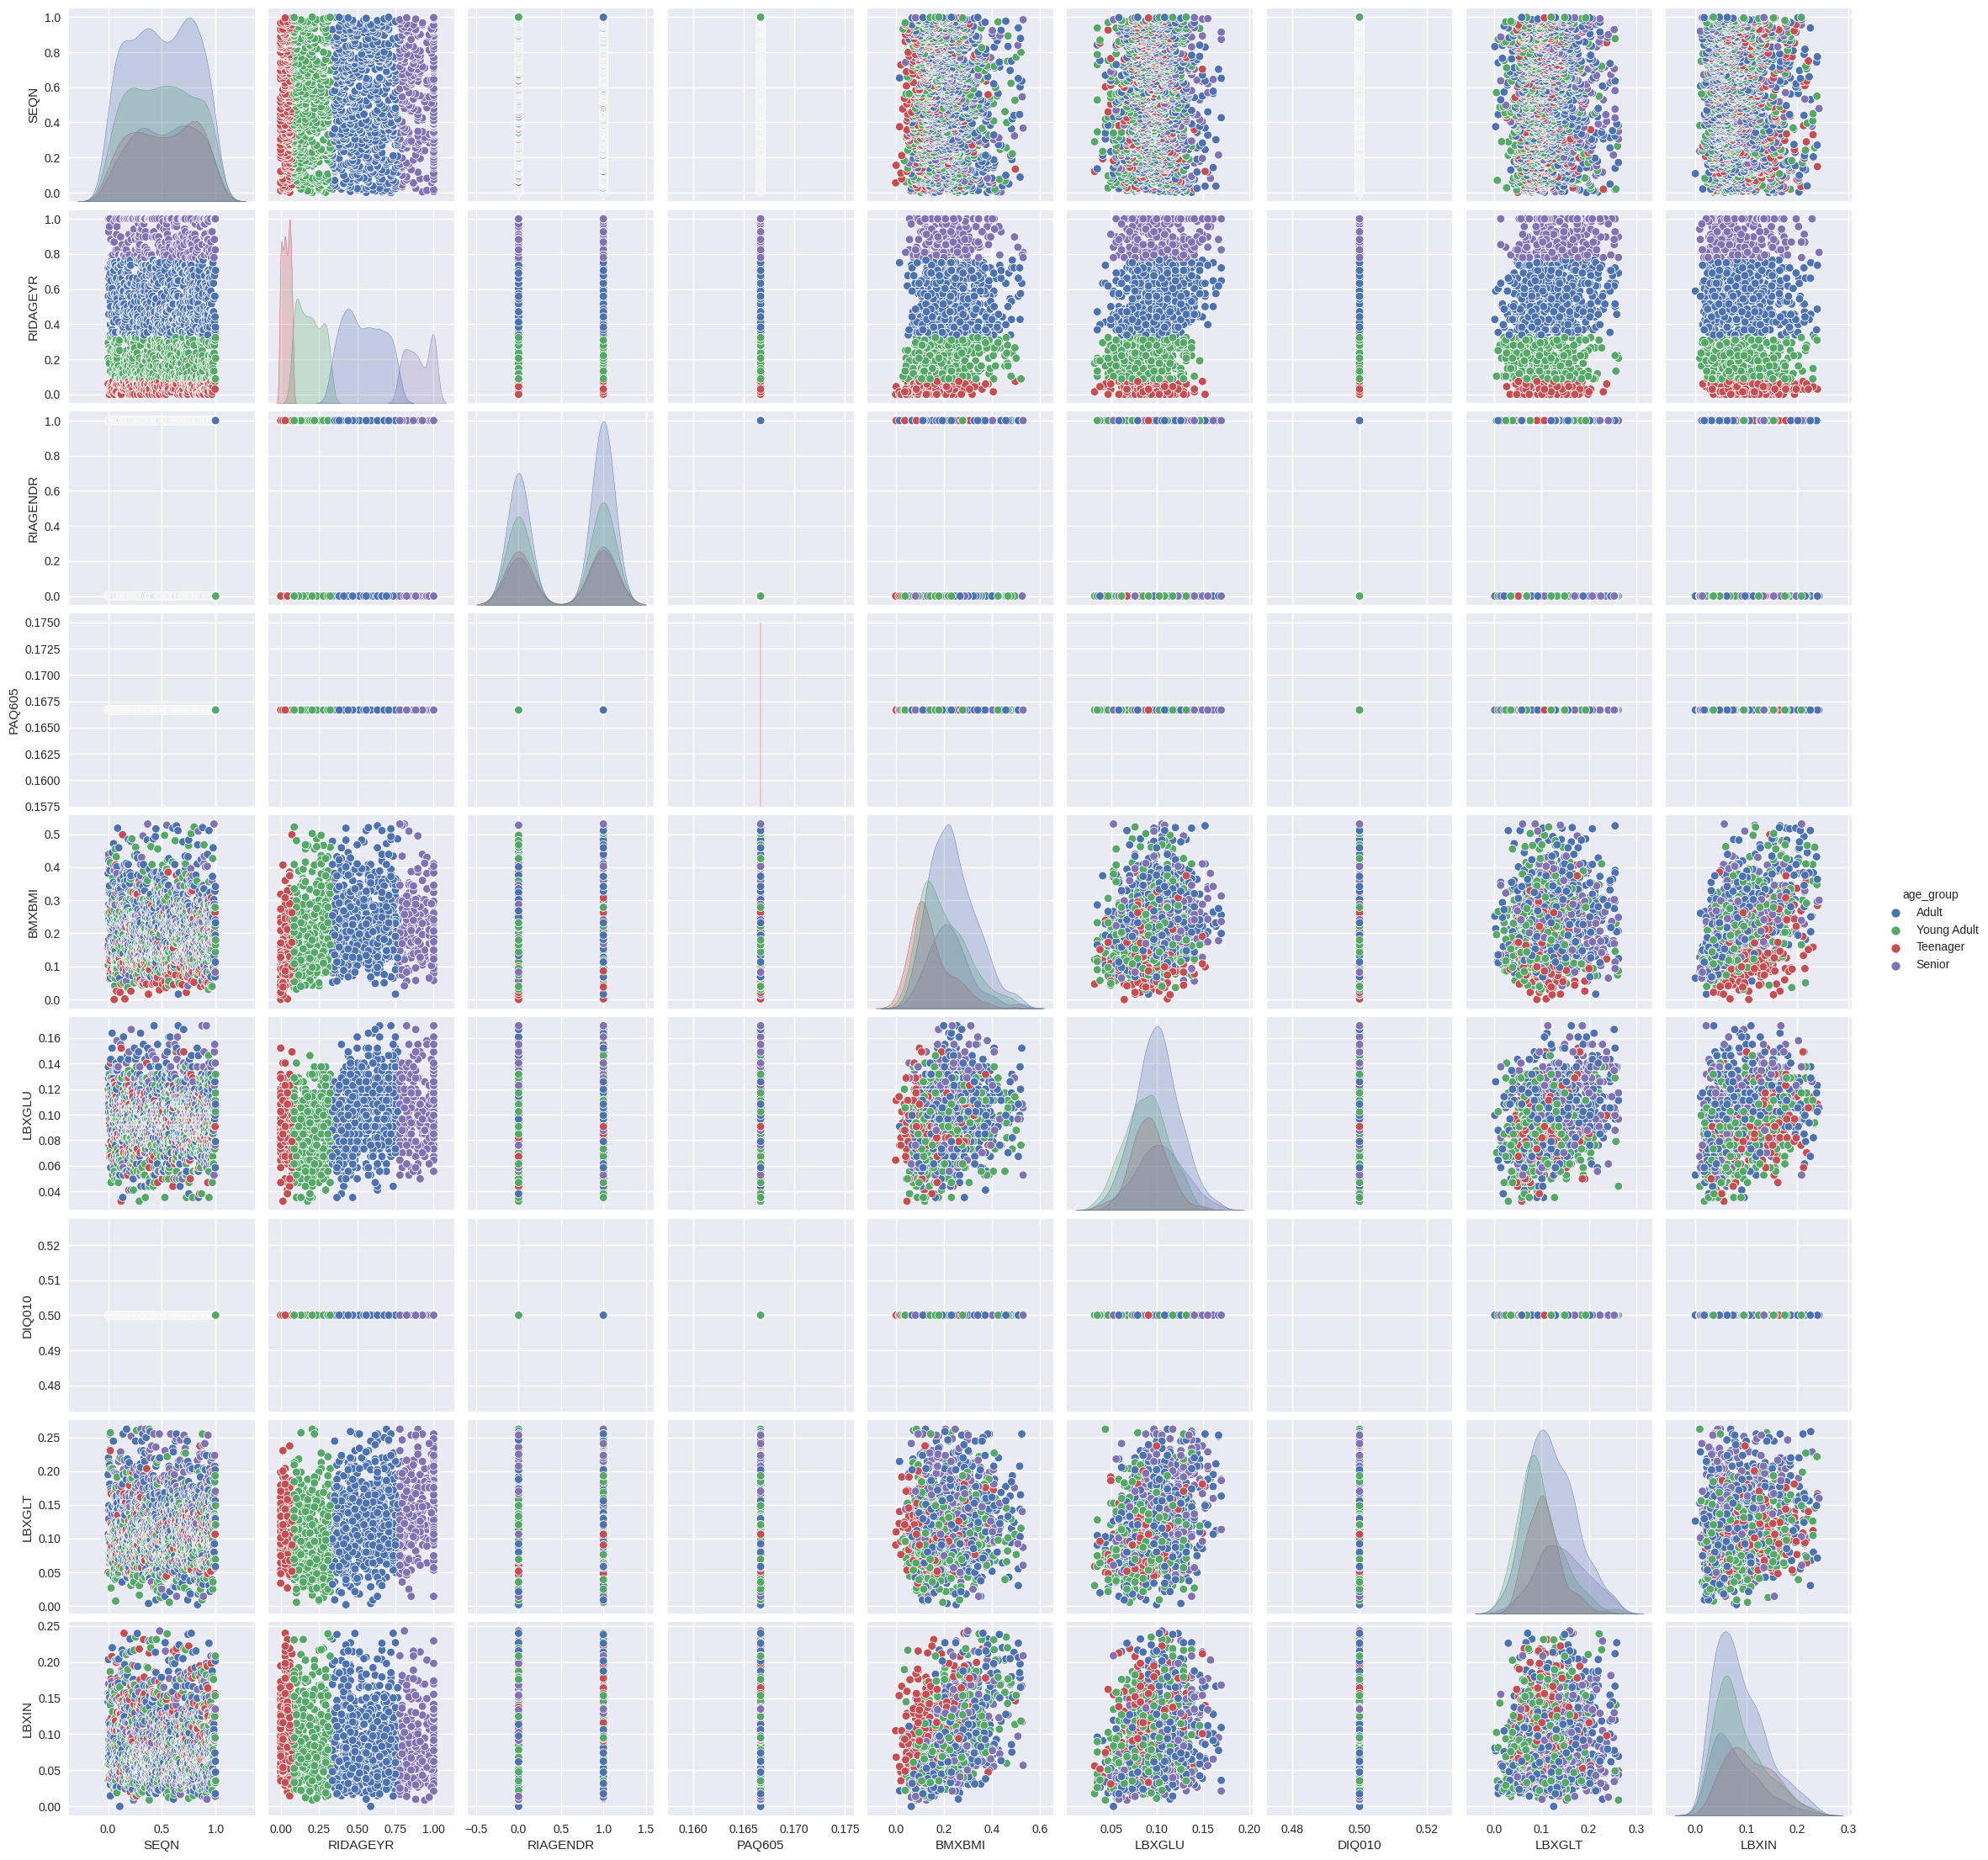

In [ ]:
# plot the data
sns.pairplot(df, hue='age_group', height=2.5);

In [ ]:
df

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0.000000,Adult,0.720588,1.0,0.166667,0.381295,0.137427,0.5,0.195035,0.144591
1,0.000394,Young Adult,0.205882,1.0,0.166667,0.104317,0.076023,0.5,0.070922,0.036319
2,0.001181,Teenager,0.058824,0.0,0.166667,0.156475,0.076023,0.5,0.049645,0.058737
3,0.001279,Young Adult,0.294118,0.0,0.166667,0.258993,0.119883,0.5,0.078014,0.156730
5,0.001673,Adult,0.558824,0.0,0.166667,0.163669,0.137427,0.5,0.106383,0.058150
...,...,...,...,...,...,...,...,...,...,...
2272,0.998032,Young Adult,0.088235,0.0,0.166667,0.143885,0.102339,0.5,0.069149,0.032991
2273,0.998426,Adult,0.382353,1.0,0.166667,0.341727,0.108187,0.5,0.058511,0.062555
2275,0.998622,Young Adult,0.323529,0.0,0.166667,0.165468,0.116959,0.5,0.148936,0.208223
2276,0.999114,Adult,0.705882,1.0,0.166667,0.232014,0.078947,0.5,0.120567,0.047479


In [ ]:
# this line shows the corelations between values:

# 1 indicates a perfect positive correlation
# -1 indicates a perfect negative correlation
# 0 indicates no correlation
df.corr()

<ipython-input-43-a96ee46b9c5b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
SEQN,1.000000,-0.000501,-0.000606,NaN,-0.047533,-0.011415,NaN,0.014865,-0.046613
RIDAGEYR,-0.000501,1.000000,0.031326,NaN,0.260950,0.272885,NaN,0.317255,-0.115187
RIAGENDR,-0.000606,0.031326,1.000000,NaN,0.030514,-0.218403,NaN,0.044908,0.014047
PAQ605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMXBMI,-0.047533,0.260950,0.030514,NaN,1.000000,0.200446,NaN,0.143545,0.438849
LBXGLU,-0.011415,0.272885,-0.218403,NaN,0.200446,1.000000,NaN,0.344809,0.277221
DIQ010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LBXGLT,0.014865,0.317255,0.044908,NaN,0.143545,0.344809,NaN,1.000000,0.147949
LBXIN,-0.046613,-0.115187,0.014047,NaN,0.438849,0.277221,NaN,0.147949,1.000000


In [ ]:
#  preparing the data for a machine learning model
X = df.iloc[:, 3:10] # extracts the independent values from the first 4 columns (:4)
y = df.iloc[:, -9] # extracts the dependent variable from the last secolumn (:-1)
# the next 3 lines replace the categorical labels in the y variable with numerical values
y

0             Adult
1       Young Adult
2          Teenager
3       Young Adult
5             Adult
           ...     
2272    Young Adult
2273          Adult
2275    Young Adult
2276          Adult
2277    Young Adult
Name: age_group, Length: 1526, dtype: object

In [ ]:
y.replace("Teenager", 0, inplace=True) # Teenager with 0
y.replace("Young Adult", 1, inplace=True) # Young Adult with 1
y.replace("Adult", 2, inplace=True) # Adult with 2
y.replace("Senior", 3, inplace=True) # Senior with 2
df

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0.000000,2,0.720588,1.0,0.166667,0.381295,0.137427,0.5,0.195035,0.144591
1,0.000394,1,0.205882,1.0,0.166667,0.104317,0.076023,0.5,0.070922,0.036319
2,0.001181,0,0.058824,0.0,0.166667,0.156475,0.076023,0.5,0.049645,0.058737
3,0.001279,1,0.294118,0.0,0.166667,0.258993,0.119883,0.5,0.078014,0.156730
5,0.001673,2,0.558824,0.0,0.166667,0.163669,0.137427,0.5,0.106383,0.058150
...,...,...,...,...,...,...,...,...,...,...
2272,0.998032,1,0.088235,0.0,0.166667,0.143885,0.102339,0.5,0.069149,0.032991
2273,0.998426,2,0.382353,1.0,0.166667,0.341727,0.108187,0.5,0.058511,0.062555
2275,0.998622,1,0.323529,0.0,0.166667,0.165468,0.116959,0.5,0.148936,0.208223
2276,0.999114,2,0.705882,1.0,0.166667,0.232014,0.078947,0.5,0.120567,0.047479


In [ ]:
x_MLP = x
y_MLP = y

In [ ]:
# convert the numerical labels in y into one-hot encoded vectors
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder() #  creates an instance of the OneHotEncoder class
y = np.array(y) # converts the variable y to a NumPy array
# y[:, np.newaxis] -> adds a new axis to the array, transforming it from a 1D array into a 2D array with a single column
# enc.fit_transform(...) ->  fits the encoder to the data (learning the unique values in the reshaped array) and transforms the data (converting each class into a one-hot encoded vector)
# .toarray() -> convert the sparse matrix into a dense NumPy array
Y = enc.fit_transform(y[:, np.newaxis]).toarray()
Y

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [ ]:
# This code  is using scikit-learn's train_test_split function to split the feature (X) and target (Y) datasets into training and testing sets
from sklearn.model_selection import train_test_split

# split the data:
# X: The feature dataset
# Y: The target dataset
#test_size=0.2: This parameter specifies that 20% of the data will be used as the test set, and the remaining 80% will be used as the training set
# random_state=1: This parameter sets the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # print the shape

(1220, 7) (306, 7) (1220, 4) (306, 4)


In [ ]:
# standardize the feature data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # create a StandardScaler object
normalized_x_train = scaler.fit_transform(X_train) # transforming the training data
normalized_x_test = scaler.transform(X_test) # transforming the testing data

In [ ]:
normalized_x_train # contains the standardized version of the training feature set

array([[ 9.03037203e-01, -2.77555756e-17, -1.55195699e-01, ...,
         0.00000000e+00,  2.47856696e-01, -5.75234835e-01],
       [-1.10737409e+00, -2.77555756e-17,  6.63912985e-01, ...,
         0.00000000e+00,  2.03380268e+00,  1.56311002e+00],
       [-1.10737409e+00, -2.77555756e-17, -1.11675807e+00, ...,
         0.00000000e+00,  3.17893793e-01,  8.83450225e-01],
       ...,
       [-1.10737409e+00, -2.77555756e-17,  1.00224048e+00, ...,
         0.00000000e+00,  7.38116378e-01, -6.36841425e-01],
       [ 9.03037203e-01, -2.77555756e-17,  6.63912985e-01, ...,
         0.00000000e+00, -5.22551377e-01, -3.50668879e-01],
       [-1.10737409e+00, -2.77555756e-17,  1.11904959e-01, ...,
         0.00000000e+00, -1.46805219e+00, -4.08300850e-01]])

In [ ]:
x_test_MPL = normalized_x_test
Y_test_MPL = y_test
x_train_MPL = normalized_x_train
Y_train_MPL = y_train

In [ ]:
# import necessary libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

np.random.seed(1337) # set a random seed

model = Sequential() # create a sequential model
model.add(InputLayer(input_shape = x_train_MPL[0].shape)) # add an input layer
# the nex 2 lines add two fully connected (dense) layers with rectified linear unit (ReLU) activation functions
model.add(Dense(8, activation="relu", name="layer1"))
model.add(Dense(8, activation="relu", name="layer2"))
model.add(Dense(4, activation = "softmax", name="layer3")) # add an output layer with three neuronsand a softmax activation function

model.summary() # print a summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 8)                 64        
                                                                 
 layer2 (Dense)              (None, 8)                 72        
                                                                 
 layer3 (Dense)              (None, 4)                 36        
                                                                 
Total params: 172 (688.00 Byte)
Trainable params: 172 (688.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print("Shapes after train-test split:")
print("x_train_MPL shape:", x_train_MPL.shape)
print("x_test_MPL shape:", x_test_MPL.shape)
print("Y_train_MPL shape:", Y_train_MPL.shape)
print("Y_test_MPL shape:", Y_test_MPL.shape)

Shapes after train-test split:
x_train_MPL shape: (1220, 7)
x_test_MPL shape: (306, 7)
Y_train_MPL shape: (1220, 4)
Y_test_MPL shape: (306, 4)


In [ ]:
# initializing recall and precision metrics
recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

# compile the model
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy", precision, recall])

# train the model
history = model.fit(x_train_MPL, Y_train_MPL,
                    epochs = 100,
                    batch_size=5,
                    verbose=0,
                    validation_data=(x_test_MPL, Y_test_MPL))

In [ ]:
# containing the training history of the neural network model
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [ ]:
score = model.evaluate(normalized_x_test, y_test, verbose=0) # evaluate the model
print('Test loss:', score[0]) # print test loss
print('Test accuracy:', score[1]) # print test accuray
print('Test precision:', score[2]) # print test precision
print('Test recall:', score[3]) # print test recall

Test loss: 1.0811574459075928
Test accuracy: 0.5065359473228455
Test precision: 0.562841534614563
Test recall: 0.3366013169288635


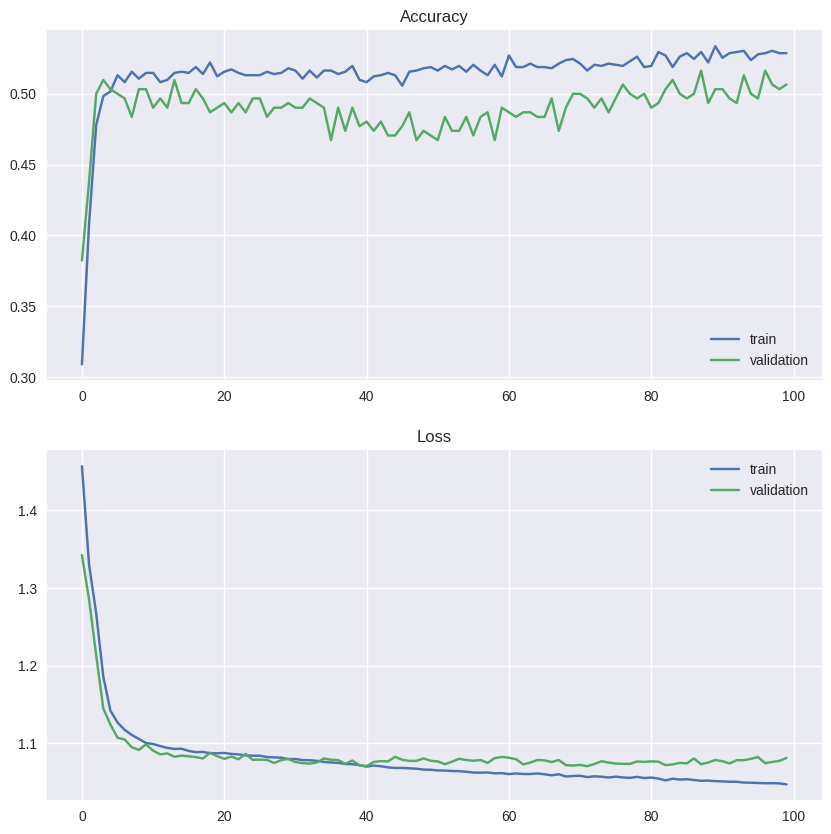

In [ ]:
# generate a two-subplot figure to visualize the training and validation accuracy + the training and validation loss over epochs
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax1.plot(train_accuracy, label='train')
ax1.plot(val_accuracy, label='validation')
ax1.set_title("Accuracy")

ax2.plot(train_loss, label='train')
ax2.plot(val_loss, label='validation')
ax2.set_title("Loss")

ax1.legend()
ax2.legend();

*Recurrent Neural Networks (RNN)*

In [ ]:
pip install numpy

In [ ]:
pip install tensorflow

In [ ]:
pip install scikit-learn

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
X = df.iloc[:, 3:10] # extracts the independent values from the first 4 columns (:4)
y = df.iloc[:, -9] # extracts the dependent variable from the last secolumn (:-1)
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder() #  creates an instance of the OneHotEncoder class
y = np.array(y) # converts the variable y to a NumPy array

Y = enc.fit_transform(y[:, np.newaxis]).toarray()
Y

from sklearn.model_selection import train_test_split

# split the data:
# X: The feature dataset
# Y: The target dataset
#test_size=0.2: This parameter specifies that 20% of the data will be used as the test set, and the remaining 80% will be used as the training set
# random_state=1: This parameter sets the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # print the shape

(1220, 7) (306, 7) (1220, 4) (306, 4)


In [ ]:
x_test_RNN = X_test
Y_test_RNN = y_test
x_train_RNN = X_train
Y_train_RNN = y_train

In [ ]:
# standardize the feature data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # create a StandardScaler object
normalized_x_train = scaler.fit_transform(X_train) # transforming the training data
normalized_x_test = scaler.transform(X_test) # transforming the testing data

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

normalized_x_train_reshaped = normalized_x_train.reshape(
    normalized_x_train.shape[0], 1, normalized_x_train.shape[1]
)

In [ ]:
num_classes = Y_train_RNN.shape[1]

model = Sequential()
model.add(LSTM(128, input_shape=(1, x_train_RNN.shape[1]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


In [ ]:
model.add(Dense(num_classes, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

history = model.fit(normalized_x_train_reshaped,
          Y_train_RNN,
          epochs=3,
          validation_split=0.2)


Epoch 1/3
31/31 [==============================] - 15s 116ms/step - loss: 1.3642 - accuracy: 0.4078 - val_loss: 1.3477 - val_accuracy: 0.4180
Epoch 2/3
31/31 [==============================] - 1s 42ms/step - loss: 1.3379 - accuracy: 0.4078 - val_loss: 1.3247 - val_accuracy: 0.4180
Epoch 3/3
31/31 [==============================] - 1s 36ms/step - loss: 1.3124 - accuracy: 0.4078 - val_loss: 1.3146 - val_accuracy: 0.4180


In [ ]:
# Evaluate the model on the test data
accuracyRNN = model.evaluate(x_test_RNN.reshape(x_test_RNN.shape[0], 1, x_test_RNN.shape[1]), Y_test_RNN)
print("Test Accuracy:", accuracyRNN[1])

10/10 [==============================] - 0s 8ms/step - loss: 1.3095 - accuracy: 0.4118
Test Accuracy: 0.4117647111415863


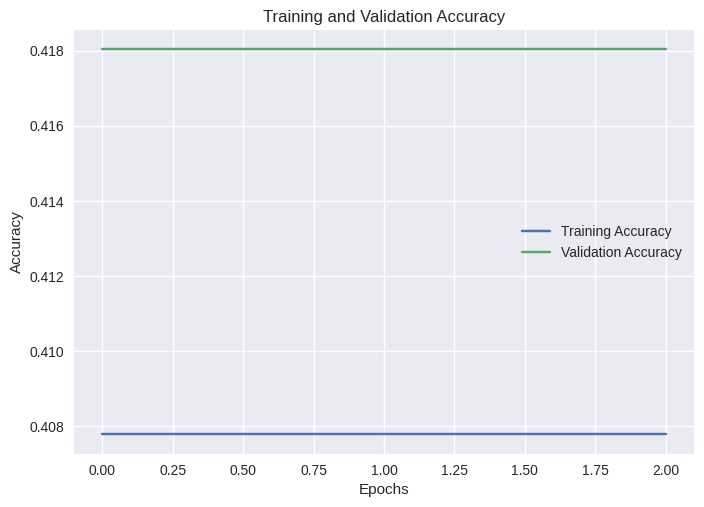

In [ ]:
import matplotlib.pyplot as plt
# Plotting training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 7. Analyse the parameters of the machine learning methods on the classification accuracy

---



In this section I will try to improve the parameters for all the 3 methods.

**For SVM:**

Accuracy= Number of correct predictions/Total number of test samples

The model correctly predicted the class of around 39.47% of the instances in the dataset.

In [ ]:
# I calucalted the accuracy in the last section
print("Accuracy for SVM:", accuracySVM)

Accuracy for SVM: 0.3684210526315789


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search through
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf' kernel
    'kernel': ['rbf', 'linear', 'poly']  # Kernel type
}

# Initialize the SVM classifier
svm = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_SVM, Y_train_SVM)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


After the best paramter selection I got an accuracy of 0.5 suggests that the classifier achieved a higher level of accuracy on the data.

In [ ]:
best_svm = SVC(**best_params)
best_svm.fit(x_train_SVM, Y_train_SVM)

# Evaluate the model
accuracy_new_SVM = best_svm.score(x_test_SVM, Y_test_SVM)
print("Accuracy:", accuracy_new_SVM)


Accuracy: 0.42105263157894735


**For MLP:**

In [ ]:
print("Initial accuracy MLP:", score[1])

Initial accuracy MLP: 0.5065359473228455


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense


num_classes = 4
# Hyperparameters to tune
lstm_units_list = [64, 128]
dropout_rates = [0.2, 0.3]
learning_rates = [0.001, 0.01]
batch_sizes = [32, 64]
epochs = [5, 10]

best_accuracyMPL = 0
best_paramsMPL = {}

import numpy as np

for lstm_units in lstm_units_list:
    for dropout_rate in dropout_rates:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                for epoch in epochs:
                    # Reshape input data
                    x_train_reshaped = x_train_MPL.reshape(x_train_MPL.shape[0], 1, x_train_MPL.shape[1])
                    x_test_reshaped = x_test_MPL.reshape(x_test_MPL.shape[0], 1, x_test_MPL.shape[1])

                    # Build the model with current hyperparameters
                    model = Sequential()
                    model.add(LSTM(lstm_units, input_shape=(1, x_train_MPL.shape[1]), activation='relu', return_sequences=True))
                    model.add(Dropout(dropout_rate))
                    model.add(LSTM(lstm_units, activation='relu'))
                    model.add(Dropout(dropout_rate))
                    model.add(Dense(32, activation='relu'))
                    model.add(Dropout(dropout_rate))
                    model.add(Dense(10, activation='softmax'))  # Adjust 10 to num_classes
                    model.add(Dense(num_classes, activation='softmax'))

                    opt = tf.keras.optimizers.Adam(learning_rate=lr)

                    model.compile(
                        loss='categorical_crossentropy',
                        optimizer=opt,
                        metrics=['accuracy'],
                    )

                    # Train the model
                    history = model.fit(
                        x_train_reshaped,
                        Y_train_MPL,
                        epochs=epoch,
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=0
                    )

                    # Evaluate the model on validation data
                    _, accuracy = model.evaluate(
                        x_test_reshaped,
                        Y_test_MPL,
                        verbose=0
                    )

                    # Check if current model's accuracy is better than the previous best accuracy
                    if accuracy > best_accuracyMPL:
                        best_accuracyMPL = accuracy
                        best_paramsMPL = {
                            'lstm_units': lstm_units,
                            'dropout_rate': dropout_rate,
                            'learning_rate': lr,
                            'batch_size': batch_size,
                            'epochs': epoch
                        }

print("Best parameters:", best_paramsMPL)
print("Best accuracy:", best_accuracyMPL)


Best parameters: {'lstm_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 10}
Best accuracy: 0.5032680034637451


In [ ]:
accuracy_MLP_new = best_accuracyMPL

**For RNN:**

In [ ]:
print("Initial accuracy MLP:", accuracyRNN)

Initial accuracy MLP: [1.309458613395691, 0.4117647111415863]


In [ ]:
import tensorflow as tf

# Hyperparameters to tune
lstm_units_list = [64, 128]
dropout_rates = [0.2, 0.3]
learning_rates = [0.001, 0.01]
batch_sizes = [32, 64]
epochs = [5, 10]

best_accuracy = 0
best_params = {}

for lstm_units in lstm_units_list:
    for dropout_rate in dropout_rates:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                for epoch in epochs:
                    # Build the model with current hyperparameters
                    model = Sequential()
                    model.add(LSTM(lstm_units, input_shape=(1, x_train_RNN.shape[1]), activation='relu', return_sequences=True))
                    model.add(Dropout(dropout_rate))
                    model.add(LSTM(lstm_units, activation='relu'))
                    model.add(Dropout(dropout_rate))
                    model.add(Dense(32, activation='relu'))
                    model.add(Dropout(dropout_rate))
                    model.add(Dense(10, activation='softmax'))
                    model.add(Dense(num_classes, activation='softmax'))

                    opt = tf.keras.optimizers.Adam(learning_rate=lr)

                    model.compile(
                        loss='categorical_crossentropy',
                        optimizer=opt,
                        metrics=['accuracy'],
                    )

                    # Train the model
                    history = model.fit(
                        normalized_x_train_reshaped,
                        Y_train_RNN,
                        epochs=epoch,
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=0
                    )

                    # Evaluate the model on validation data
                    _, accuracy = model.evaluate(
                        x_test_RNN.reshape(x_test_RNN.shape[0], 1, x_test_RNN.shape[1]),
                        Y_test_RNN,
                        verbose=0
                    )

                    # Check if current model's accuracy is better than the previous best accuracy
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {
                            'lstm_units': lstm_units,
                            'dropout_rate': dropout_rate,
                            'learning_rate': lr,
                            'batch_size': batch_size,
                            'epochs': epoch
                        }

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)



Best parameters: {'lstm_units': 128, 'dropout_rate': 0.3, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 5}
Best accuracy: 0.43790850043296814


In [ ]:
new_accuracy_RNN = best_accuracy

# 8. Comparison of ML methods for classification or prediction with the best parameters selected

---



After the improvment of the models, the accuracy scores obtained show that the Multilayer Perceptron (MLP) achieved a slightly higher accuracy compared to Recurrent Neural Networks (RNN) and Support Vector Machine (SVM).

Although, MLP model appears to perform slightly better compared to the other models, the choice between models might also consider factors such as computational complexity, interpretability, and the application needs.



*   MLP Accuracy: 50.32%
*   SVM Accuracy: 39.37%
*   RNN Accuracy: 50.24%  




In [ ]:
# Compare performance
print("SVM Accuracy:", accuracy_new_SVM)
print("MLP Accuracy:", accuracy_MLP_new)
print("RNN Accuracy:", new_accuracy_RNN)

SVM Accuracy: 0.42105263157894735
MLP Accuracy: 0.5032680034637451
RNN Accuracy: 0.43790850043296814


# 9. Conclusion

---



I would like to note that the accuracy of approximately 50% might seem low. However, considering that the algorithms had to classify among four categories: Teenager, Young Adult, Adult, and Senior; a random guess would give a maximum accuracy of only 25%. Therefore,while there's room for improvment, the achieved accuracy is actually good given the complexity of the classification task.




In summary, I utilized the NHANES dataset to apply basic deep learning algorithms. Initially, I prepared the data and tried to implement: MLA, RNN and SVM models, comparing their performance. Ultimately, while MLP exhibited slightly superior results, in a practical scenario resembling this one, the choice between the three methods would also depend on the desired accuracy and the complexity of the dataset.